In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Downloads/IMDb Movies India.csv', encoding_errors= 'replace')

In [3]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.shape

(15509, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [7]:
df.isnull().sum()*100/df.shape[0]

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64

In [8]:
# Check for missing values
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [9]:
# Handle missing values
df = df.dropna()

In [14]:
# Year with best rating
best_year = df[df['Rating'] == df['Rating'].max()]['Year'].values[0]
print(f'The year with the best rating is {best_year}.')

The year with the best rating is (2020).


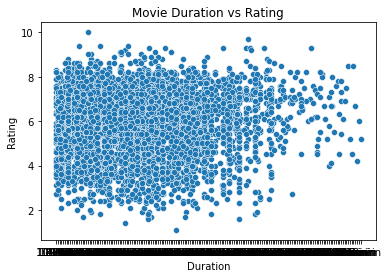

In [15]:
# Impact of length of the movie on the rating
sns.scatterplot(x='Duration', y='Rating', data=df)
plt.title('Movie Duration vs Rating')
plt.show()

In [16]:
# Top 10 movies according to rating per year and overall
top_movies_per_year = df.groupby('Year').apply(lambda x: x.nlargest(10, 'Rating'))
top_movies_overall = df.nlargest(10, 'Rating')

print('Top 10 movies by rating per year:')
print(top_movies_per_year)
print('\nTop 10 movies by rating overall:')
print(top_movies_overall)

Top 10 movies by rating per year:
                                Name    Year Duration                   Genre  \
Year                                                                            
(1931) 14161  The Light of the World  (1931)  124 min          Drama, Fantasy   
       4171                 Draupadi  (1931)  124 min                   Drama   
(1932) 6073               Indrasabha  (1932)  211 min        Musical, Romance   
(1933) 4658                     Fate  (1933)   68 min          Drama, Romance   
(1934) 9053                  Mazdoor  (1934)  155 min                   Drama   
...                              ...     ...      ...                     ...   
(2021) 12673      Secrets of Sinauli  (2021)   56 min    Documentary, History   
       6952                   Kaadan  (2021)  170 min  Action, Drama, Fantasy   
       3224        Consequence Karma  (2021)   92 min         Drama, Thriller   
       9504             Moral Nights  (2021)   93 min                   Dra

In [17]:
# Number of popular movies released each year
popular_movies_per_year = df.groupby('Year').filter(lambda x: len(x) >= 10)
print(f"Number of popular movies released each year:\n{popular_movies_per_year.groupby('Year').size()}")

Number of popular movies released each year:
Year
(1948)     10
(1949)     13
(1950)     18
(1951)     15
(1952)     16
         ... 
(2017)    211
(2018)    202
(2019)    227
(2020)    140
(2021)     63
Length: 74, dtype: int64


In [18]:
# Votes per Rating
votes_per_rating = df.groupby('Rating')['Votes'].sum()
print(f'Votes per rating:\n{votes_per_rating}')

Votes per rating:
Rating
1.1                 67,785
1.4                  3,899
1.6                  43774
1.7     6248,186275446,655
1.8     7,840162,455262730
               ...        
9.2                   3697
9.3      72946794671,37336
9.4                 471816
9.7                      7
10.0                     5
Name: Votes, Length: 83, dtype: object


In [19]:
# Identifying director who has directed the most movies
director_counts = df['Director'].value_counts()
most_movies_director = director_counts.index[0]
print(f'The director who has directed the most movies is {most_movies_director} with {director_counts[0]} movies.')

The director who has directed the most movies is David Dhawan with 41 movies.


In [20]:
# Combine the actor columns into a single column
actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']])

# Count the number of times each actor appears in the DataFrame
actor_counts = actors.value_counts()

# Display the top 10 actors
top_10_actors = actor_counts.nlargest(10)
for actor, count in top_10_actors.items():
    print(f'{actor} ({count} movies)')

Mithun Chakraborty (160 movies)
Amitabh Bachchan (148 movies)
Dharmendra (146 movies)
Ashok Kumar (124 movies)
Akshay Kumar (120 movies)
Shashi Kapoor (117 movies)
Jeetendra (116 movies)
Sanjay Dutt (101 movies)
Rekha (92 movies)
Ajay Devgn (92 movies)


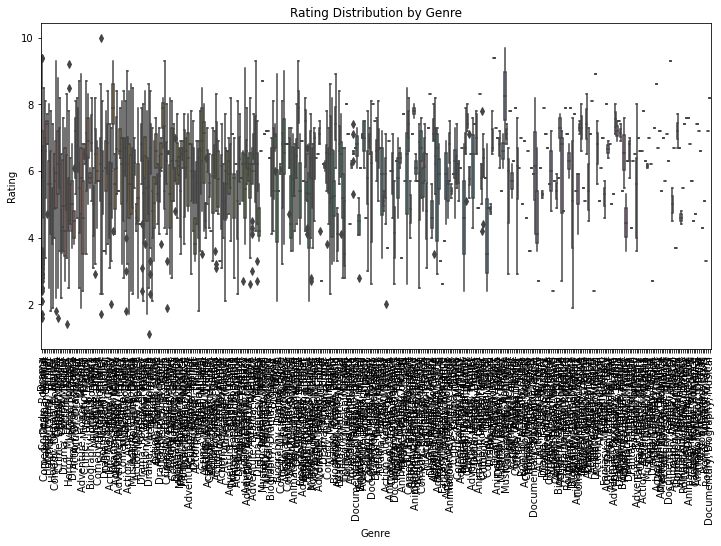

In [21]:
# Box plot: Rating distribution by Genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Rating', data=df)
plt.title('Rating Distribution by Genre')
plt.xticks(rotation=90)
plt.show()

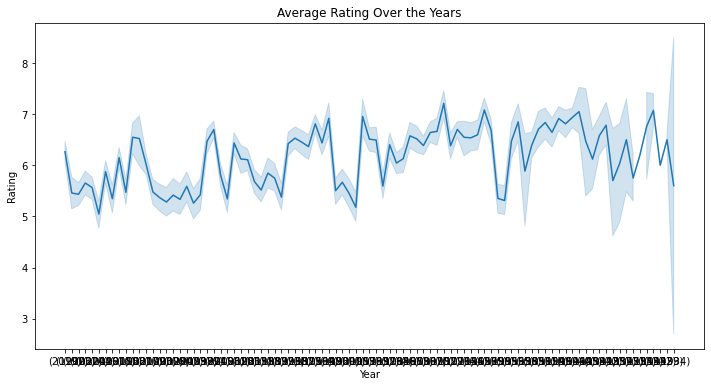

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Rating', data=df)
plt.title('Average Rating Over the Years')
plt.show()

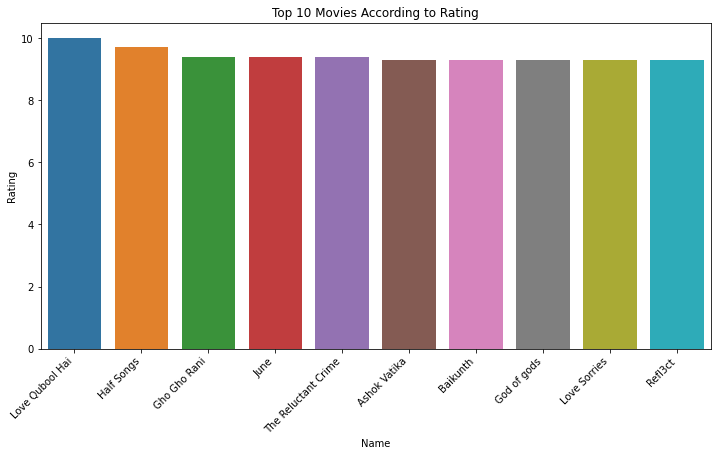

In [23]:
# Bar plot: Top 10 movies according to rating
top_10_movies = df.nlargest(10, 'Rating')
plt.figure(figsize=(12, 6))
sns.barplot(x='Name', y='Rating', data=top_10_movies)
plt.title('Top 10 Movies According to Rating')
plt.xticks(rotation=45, ha='right')
plt.show()